<a href="https://colab.research.google.com/github/wolfram-laube/dsp-ue_grp-22/blob/main/Assignment_2/DSP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
! mkdir -p fig

# Digital Signal Processing Tutorial (382.047/64/66/67/68/69/70), 2024S

![](https://cdn.mathpix.com/cropped/2024_04_16_05aa650c2cf9d2378737g-1.jpg?height=111&width=285&top_left_y=316&top_left_x=220)

JOHANNES KEPLER UNIVERSITY LINZ

Matthias Wagner, Bernhard Plaimer

Assignment 2

Discrete Time Signals, Convolution, DTFT

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_Courselnfo.pdf.

Submission deadline is Tuesday, April 30th, 2024, 08:00.

Exercise 1 Discrete Time Signals (30\%)

(a) The following discrete time signals should be plotted in Matlab as indicated in Fig.1.

$$
\begin{array}{ll}
x_{1}[n]=-4 \delta[n+3]+4 \delta[n]-\delta[n-3]+2 \delta[n-7] & \text { for }-5 \leq n \leq 10 \\
x_{2}[n]=e^{-0.31 n} & \text { for }-5 \leq n \leq 10 \\
x_{3}[n]=3 \sin \left(2 \pi \frac{3.5}{64} n\right) & \text { for } 0 \leq n \leq 256 \\
x_{4}[n]=-\cos \left(\frac{9}{64} n\right) & \text { for } 0 \leq n \leq 256
\end{array}
$$

- To indicate the discrete time nature of the signals the stem command should be used, unless the signal length becomes too long in which case the plot command should be used instead. You should choose the ideal way to plot the signals.
- Extend the Matlab script dsp_A2_1.m. Useful commands are figure, stem, plot, subplot, xlabel, ylabel, title, legend, hold on, grid on, pi.
- You can use the provided function impseq.

![](https://cdn.mathpix.com/cropped/2024_04_16_05aa650c2cf9d2378737g-1.jpg?height=300&width=1063&top_left_y=1740&top_left_x=585)

Fig. 1: Required arrangement of plots.

(b) What is the normalized angular frequency $\Omega$ for $x_{3}[n]$ and $x_{4}[n]$.

(c) Are the signals $x_{3}[n]$ and $x_{4}[n]$ periodic? If yes, what is their fundamental period?

(d) Write the Matlab function custom_power which calculates the mean power of a discrete time periodic signal according to $P=\frac{1}{N} \sum_{n=0}^{N-1}|x[n]|^{2}$.

Pass exactly one signal period to this function to calculate the powers of all periodic (!) signals in (a).

(e) Now assume that all signals in (a) are zero outside the plot range (e.g. $x_{2}[11]=0$ ).

Write a function energy which calculates the signal energy according to $W=\sum_{n=-\infty}^{\infty}|x[n]|^{2}$.

Determine the energies for all these time-limited signals $x_{1}[n]$ to $x_{4}[n]$.

(f) Collect all the signal powers of (d) and signal energies of (e) in a single table in your protocol.

## Exercise 2 Convolution-1 (20\%)

The signal $x[n]=(3,-1,2,0,1)$ at sample times $n=(0,1,2,3,4)$ is the input to an LTI system with impulse response $h[n]=(2,3,4,1)$ at sample times $n=(0,1,2,3)$.

(a) How long is the output signal $y[n]$ ?

(b) Manually calculate the output signal $y[n]$.


Given:
- $x[n] = (3, -1, 2, 0, 1)$ with length $N = 5$
- $h[n] = (2, 3, 4, 1)$ with length $M = 4$

(a) Length of the Output Signal $y[n]$
To find the length of $y[n]$:
$$
N + M - 1 = 5 + 4 - 1 = 8
$$
So, the output signal $y[n]$ will be 8 samples long.

(b) Manually Calculate the Output Signal $y[n]$
To manually calculate the output signal $y[n]$, we need to perform the convolution of $x[n]$ and $h[n]$. This can be expressed as:
$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^\infty x[k] \cdot h[n-k]
$$
However, since $x$ and $h$ are both finite sequences, the summation is only over the overlapping indices:
$$
y[n] = \sum_{k=\max(0, n+1-M)}^{\min(n, N-1)} x[k] \cdot h[n-k]
$$

We'll compute this manually:

1. $y[0] = x[0]h[0]$
2. $y[1] = x[0]h[1] + x[1]h[0]$
3. $y[2] = x[0]h[2] + x[1]h[1] + x[2]h[0]$
4. $y[3] = x[0]h[3] + x[1]h[2] + x[2]h[1] + x[3]h[0]$
5. $y[4] = x[1]h[3] + x[2]h[2] + x[3]h[1] + x[4]h[0]$
6. $y[5] = x[2]h[3] + x[3]h[2] + x[4]h[1]$
7. $y[6] = x[3]h[3] + x[4]h[2]$
8. $y[7] = x[4]h[3]$

The output signal $y[n]$ resulting from the convolution of $x[n]$ and $h[n]$ is given by:
$$
y[n] = (6, 7, 13, 5, 9, 5, 4, 1)
$$

This calculation corresponds to the values derived from manually applying the convolution sum for each output sample. Each element in $y[n]$ is computed based on the overlapping products of $x[n]$ and $h[n-k]$ for each shift $k$.


## Exercise 3 Convolution-2 (25\%)

The impulse response of an LTI system is $h[n]=(0.25,0.5,0.25)$ at sample indices $n=(0,1,2)$.

The input signal is $x[n]=\cos \left(\frac{2 \pi}{20} n\right)$ for $0 \leq n<50$.

(a) What is the length $L y$ of the output signal $y[n]$ ?

(b) Implement the convolution operation $y[n]=\sum_{i=0}^{L_{h}-1} h[i] x[n-i]$ in Matlab as 2 nested forloops to calculate all $L_{y}$ output samples of $y[n]$. The outer for-loop increments the output index $n$, the inner for-loop increments the memory index $i$.


In [22]:
import numpy as np

# Define the impulse response and input signal
h = np.array([0.25, 0.5, 0.25])
x = np.cos(2 * np.pi / 20 * np.arange(50))  # Generate the input signal

# Initialize the output signal array
Ly = len(x) + len(h) - 1
y = np.zeros(Ly)

# Perform convolution using nested for-loops
for n in range(Ly):
    for i in range(len(h)):
        if (n - i >= 0) and (n - i < len(x)):
            y[n] += h[i] * x[n - i]

# Print the output signal
print("Output Signal y[n]:", y)


Output Signal y[n]: [ 2.50000000e-01  7.37764129e-01  9.27782507e-01  7.89218939e-01
  5.73401123e-01  3.01454810e-01  5.55111512e-17 -3.01454810e-01
 -5.73401123e-01 -7.89218939e-01 -9.27782507e-01 -9.75528258e-01
 -9.27782507e-01 -7.89218939e-01 -5.73401123e-01 -3.01454810e-01
 -1.80411242e-16  3.01454810e-01  5.73401123e-01  7.89218939e-01
  9.27782507e-01  9.75528258e-01  9.27782507e-01  7.89218939e-01
  5.73401123e-01  3.01454810e-01  3.05311332e-16 -3.01454810e-01
 -5.73401123e-01 -7.89218939e-01 -9.27782507e-01 -9.75528258e-01
 -9.27782507e-01 -7.89218939e-01 -5.73401123e-01 -3.01454810e-01
 -4.16333634e-16  3.01454810e-01  5.73401123e-01  7.89218939e-01
  9.27782507e-01  9.75528258e-01  9.27782507e-01  7.89218939e-01
  5.73401123e-01  3.01454810e-01  5.41233725e-16 -3.01454810e-01
 -5.73401123e-01 -7.89218939e-01 -6.77782507e-01 -2.37764129e-01]


(c) Plot the signal $y[n]$.


<ipython-input-23-72fa9fd16399>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(Ly), y, basefmt=" ", use_line_collection=True)


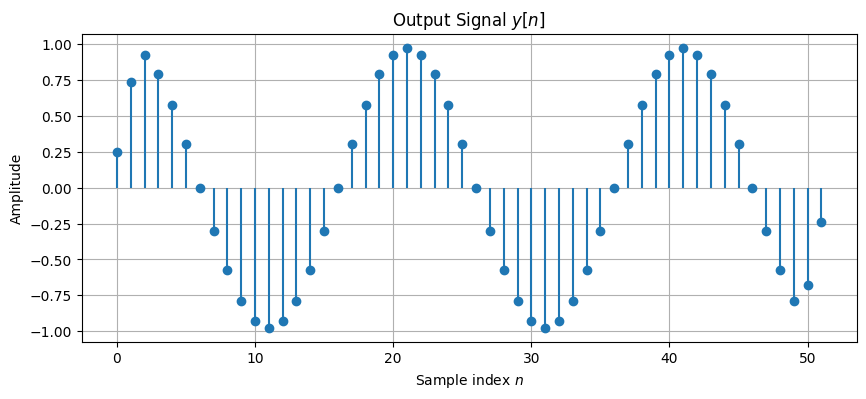

In [23]:
import matplotlib.pyplot as plt

# Plot the output signal
plt.figure(figsize=(10, 4))
plt.stem(np.arange(Ly), y, basefmt=" ", use_line_collection=True)
plt.title('Output Signal $y[n]$')
plt.xlabel('Sample index $n$')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('fig/ex3_plot.png')
plt.show()


(d) Verify the correct implementation of the convolution using the Matlab function conv. Plot both signals on top of each other, the lower one in solid line style the top in dashed style and provide a legend to your plot.


<ipython-input-24-8290fe0b96cb>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(y)), y, linefmt='b-', markerfmt='bo', basefmt='b-', label='Manual Convolution', use_line_collection=True)
<ipython-input-24-8290fe0b96cb>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(y_conv)), y_conv, linefmt='r--', markerfmt='ro', basefmt='r--', label='Numpy convolve', use_line_collection=True)


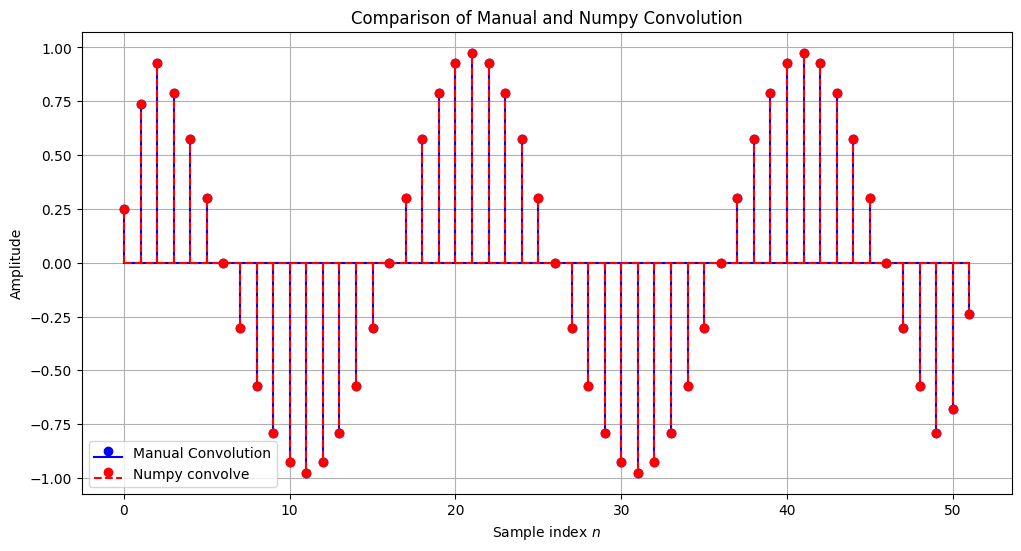

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the convolution using numpy's built-in function
y_conv = np.convolve(x, h, mode='full')

# Plot both signals for comparison
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(y)), y, linefmt='b-', markerfmt='bo', basefmt='b-', label='Manual Convolution', use_line_collection=True)
plt.stem(np.arange(len(y_conv)), y_conv, linefmt='r--', markerfmt='ro', basefmt='r--', label='Numpy convolve', use_line_collection=True)
plt.title('Comparison of Manual and Numpy Convolution')
plt.xlabel('Sample index $n$')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex3_plot_2.png')
plt.show()


## Exercise 4 Discrete Time Fourier Transform (25\%)

The time discrete sequence $x[n]=(0.8)^{|n|}(u[n+10]-u[n-11])$ should be transformed to the frequency domain by using the discrete time Fourier transform (DTFT). As $x[n]$ has finite support (that means it is a sequence of finite length), $X\left(e^{j \Omega}\right)$ can be determined numerically via Matlab (or alternatively Octave, Python).

(a) Create a Matlab function, that is able to calculate the DTFT of a finite sequence. The function should provide the following interface:


![](https://cdn.mathpix.com/cropped/2024_04_16_05aa650c2cf9d2378737g-2.jpg?height=363&width=1619&top_left_y=1882&top_left_x=279)


Try to avoid for loops! You are still allowed to use for loops, however there will be a small deduction in points for the case you need to use for loops.


In [13]:
def dtft(x, n, w):
    """
    Compute the Discrete-time Fourier Transform (DTFT) of a finite sequence.

    :param x: Finite duration sequence over n (numpy array)
    :param n: Sample position vector (numpy array)
    :param w: Frequency location vector (numpy array)
    :return: DTFT values computed at w frequencies (numpy array)
    """
    # Convert all inputs to numpy arrays to ensure proper calculations
    x = np.array(x)
    n = np.array(n)
    w = np.array(w)

    # Create a 2D meshgrid for the frequencies and samples for broadcasting
    N, W = np.meshgrid(n, w)

    # Compute the DTFT using broadcasting and vectorized operations
    X = np.exp(-1j * N * W) @ x
    return X


(b) Plot magnitude and phase response of $X\left(e^{j \Omega}\right)$ for the interval $-\pi \leq \Omega \leq \pi$ within single subplots. What do you observe for the phase response (hint: you should have a close look at the scaling of the $y$ axis)?


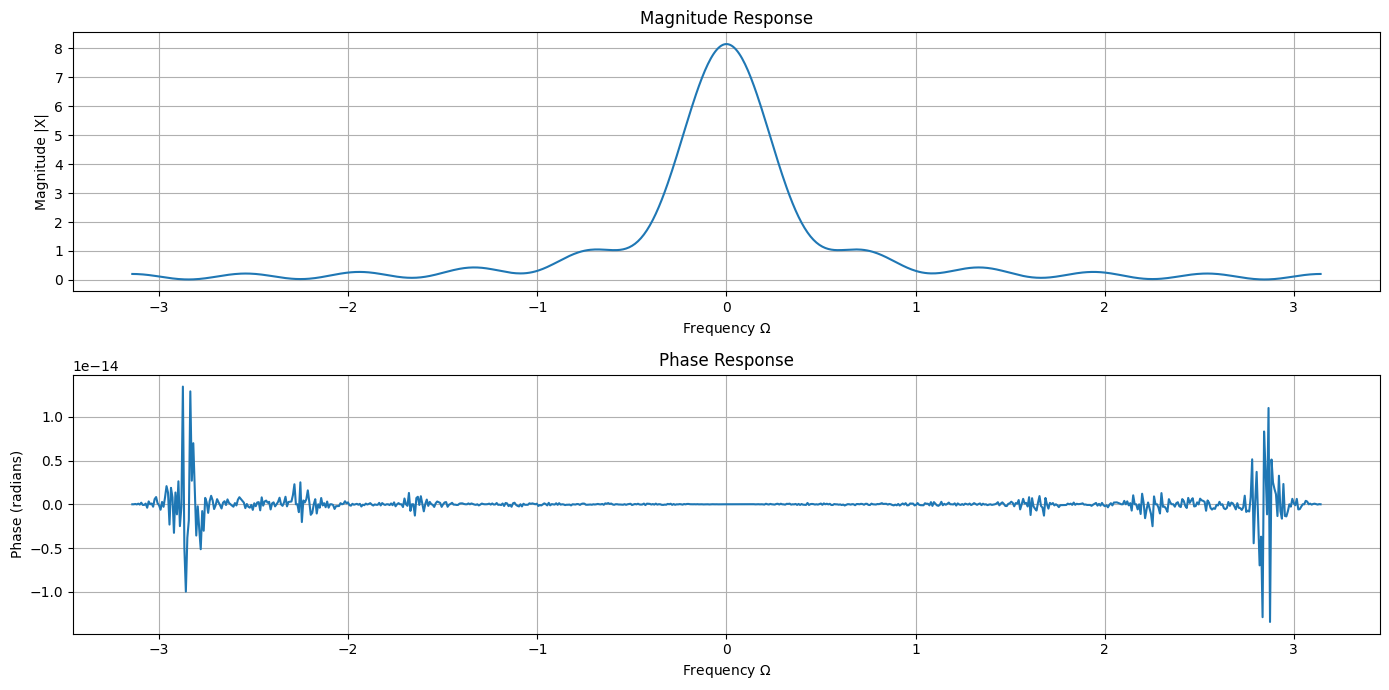

In [14]:
import matplotlib.pyplot as plt

# Define the sequence parameters
n = np.arange(-10, 11)  # Since the sequence is finite and nonzero for n between -10 and 10
x = (0.8) ** np.abs(n) * (n >= -10) * (n <= 10)

# Define the frequency vector
w = np.linspace(-np.pi, np.pi, 800)  # Frequency range

# Calculate the DTFT
X = dtft(x, n, w)

# Plot the magnitude and phase response
plt.figure(figsize=(14, 7))

# Magnitude response subplot
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(X))
plt.title('Magnitude Response')
plt.xlabel('Frequency $\Omega$')
plt.ylabel('Magnitude |X|')
plt.grid(True)

# Phase response subplot
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(X))
plt.title('Phase Response')
plt.xlabel('Frequency $\Omega$')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fig/ex4_b_plot.png')
plt.show()



(c) Vary the parameter $\Omega$. What do you observe in the spectrum?

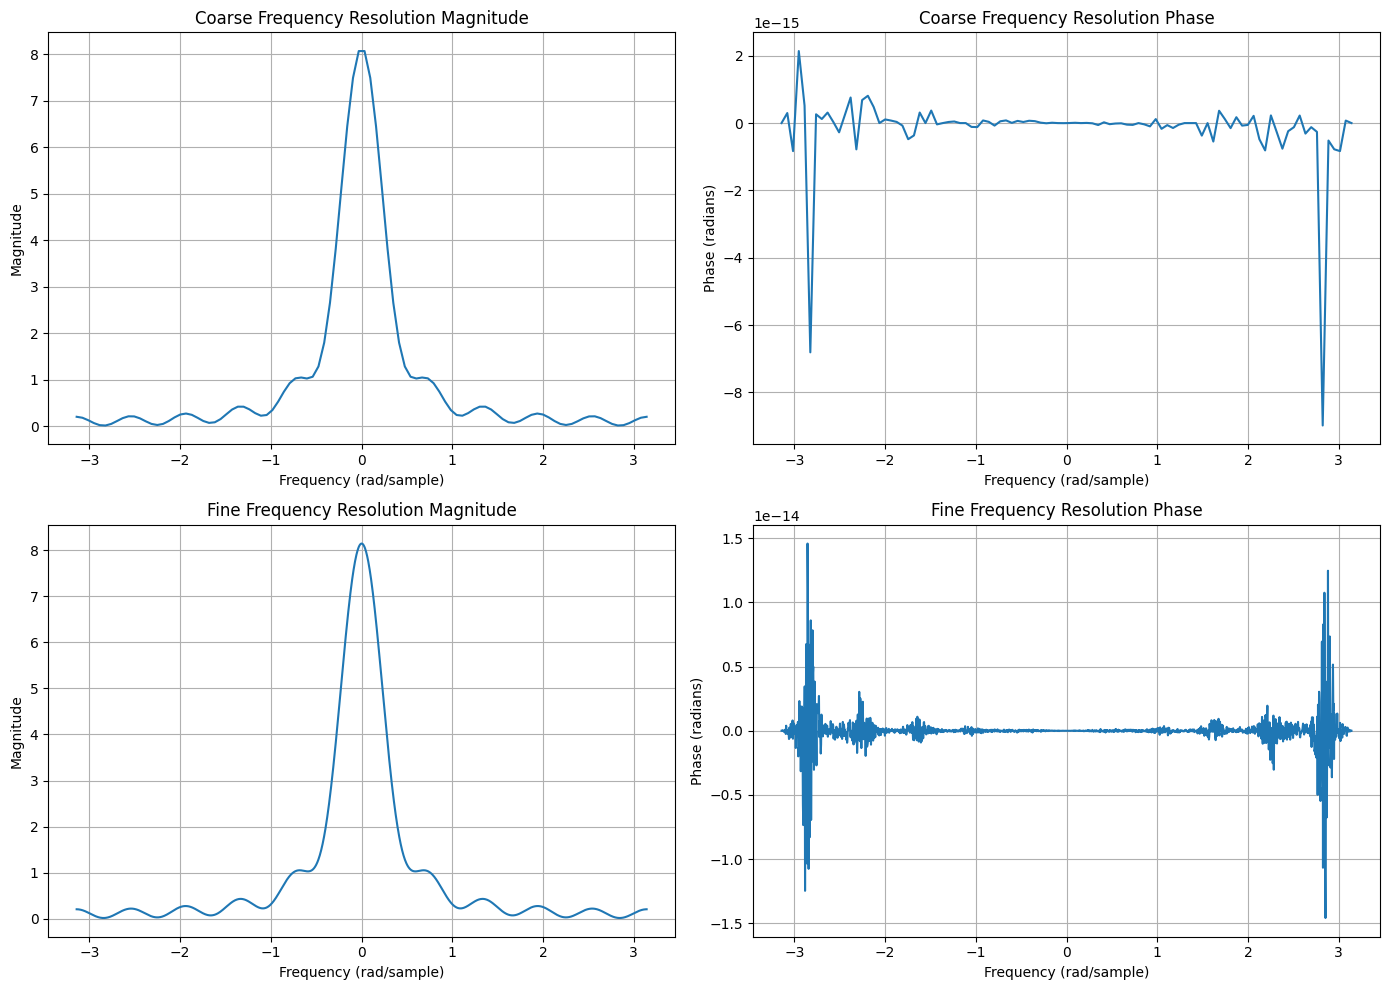

In [15]:
# Vary the frequency resolution
w_coarse = np.linspace(-np.pi, np.pi, 100)  # Coarser resolution
w_fine = np.linspace(-np.pi, np.pi, 1600)  # Finer resolution

# Calculate the DTFT with varied frequency resolutions
X_coarse = dtft(x, n, w_coarse)
X_fine = dtft(x, n, w_fine)

# Plot the magnitude and phase response for both resolutions
plt.figure(figsize=(14, 10))

# Magnitude response for coarser frequency resolution
plt.subplot(2, 2, 1)
plt.plot(w_coarse, np.abs(X_coarse))
plt.title('Coarse Frequency Resolution Magnitude')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid()

# Phase response for coarser frequency resolution
plt.subplot(2, 2, 2)
plt.plot(w_coarse, np.angle(X_coarse))
plt.title('Coarse Frequency Resolution Phase')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

# Magnitude response for finer frequency resolution
plt.subplot(2, 2, 3)
plt.plot(w_fine, np.abs(X_fine))
plt.title('Fine Frequency Resolution Magnitude')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid()

# Phase response for finer frequency resolution
plt.subplot(2, 2, 4)
plt.plot(w_fine, np.angle(X_fine))
plt.title('Fine Frequency Resolution Phase')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.savefig('fig/ex4_c_plot.png')
plt.show()